In [0]:
# Logistic regression using batch gradient descent

# Imports
import numpy as np
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression

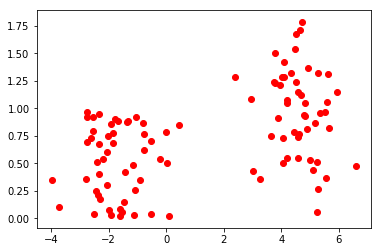

In [372]:
# generate linearly separable data
X, y = make_blobs(n_samples = 100, centers = 2, cluster_std=1.0, n_features = 1, random_state = 1)
# np.random.seed(2)
# randomize the value of y as it's only generating 0 or 1
y = y*np.random.rand(100) + np.random.rand(100, )
X = X.ravel()
plt.scatter(X, y, color = 'red')
plt.show()

In [0]:
y = []
for x in X:
  if x > 2: y.append(1)
  else: y.append(0)

def sigmoid (a):
  return 1.0 / (1 + np.exp(-a))

def predict (x1, w1, b):
  return sigmoid (w1 * x1 + b)

def dw (X, y, w1, b):
  dJ, m = 0, len(X)
  for x_, y_ in zip (X, y):
    a = predict(x_, w1, b) # a is predicted value
    dJ += (a - y_) * a * (1 - a) * x_
  return dJ / m

def db (X, y, w1, b):
  dJ, m = 0, len(X)
  for x_, y_ in zip (X, y):
    a = predict(x_, w1, b) # a is predicted value
    dJ += (a - y_) * a * (1 - a)
  return dJ / m


In [374]:
# define learning rate
eta = 0.2
# print (X, y)
# Initialize parametes w1, w2 and b

w1, b = 0, 0
prev_w1, prev_b = w1, b

# Perform optimization using gradient descent
while True:
  
  prev_w1, prev_b = w1, b
  
  w1 = w1 - eta * dw(X, y, prev_w1, prev_b)
  b = b - eta * db(X, y, prev_w1, prev_b)
  
  if abs (prev_w1 - w1) <= 0.0001 and abs (prev_b - b) <= 0.0001:
    break
  
print (w1, b)

1.8474367455658363 -2.2886391310585044


In [375]:
# Compare result with actual output of sklearn
clf = LogisticRegression (random_state=0, solver='lbfgs', multi_class='auto').fit(X.reshape(-1, 1), y)
print (clf.coef_, clf.intercept_)

[[1.86559012]] [-2.8120749]
